In [83]:
import pandas as pd

# Load data from CSV
df = pd.read_csv('output.csv')

parsed_news = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Split the 'Date' column into 'date' and 'time'
    date_scrape = row['Date'].split()
    if len(date_scrape) == 1:
        time = date_scrape[0]
    else:
        date = date_scrape[0]
        time = date_scrape[1]

    # Extract 'Search String' as 'ticker'
    ticker = row['Search String'].split(" and ")[0]

    # Append ticker, date, time, and headline to 'parsed_news' list
    parsed_news.append([ticker, date, time, row['Title']])

print(parsed_news)

[['IRFC', '2024-04-10', '10:19:16.194362', 'Indian Railway Finance Corporation Share Price Live blog for 10 Apr 2024 | Mint'], ['IRFC', '2024-04-10', '10:20:16.194379', 'Technical picks: Bajaj Finserv, IRFC among 8 stocks that can rally up to 21% in short term - Money-making Ideas'], ['IRFC', '2024-04-10', '10:19:16.194384', 'IRFC shares down 27% from one-year high; key technical levels to watch'], ['IRFC', '2024-04-10', '10:17:16.194387', 'IRFC Share Price Target: Should you BUY Railway PSU stock under Rs 200 for DIVIDEND?'], ['IRFC', '2024-04-10', '10:19:16.194391', 'IRFC, RVNL: These Top 2 Railway Stocks Vs Top 2 PSU Bank FD Returns; Where You Earn More?'], ['IRFC', '2024-04-10', '10:16:16.194395', 'Money-Making Ideas: IRFC, Bajaj Finance, HDFC And Coal India Are Among Top Stocks To Buy Today | Check Share P'], ['IRFC', '2024-04-10', '10:18:16.194398', 'IRFC, RVNL, Railtel and other rail stocks fall up to 20% amidst broader market pain'], ['IRFC', '2024-04-10', '10:17:16.194401', 'R

In [84]:
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon file
nltk.download('vader_lexicon')

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# Update the lexicon
vader.lexicon.update(new_words)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashvardhanjadhav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [85]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


nltk.download('vader_lexicon')

# Use these column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)

vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(head) for head in scored_news.headline]

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
scored_news = scored_news.join(scores_df)

# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

print(scored_news.head())

  ticker        date             time  \
0   IRFC  2024-04-10  10:19:16.194362   
1   IRFC  2024-04-10  10:20:16.194379   
2   IRFC  2024-04-10  10:19:16.194384   
3   IRFC  2024-04-10  10:17:16.194387   
4   IRFC  2024-04-10  10:19:16.194391   

                                            headline  neg    neu    pos  \
0  Indian Railway Finance Corporation Share Price...  0.0  0.845  0.155   
1  Technical picks: Bajaj Finserv, IRFC among 8 s...  0.0  1.000  0.000   
2  IRFC shares down 27% from one-year high; key t...  0.0  0.833  0.167   
3  IRFC Share Price Target: Should you BUY Railwa...  0.0  0.864  0.136   
4  IRFC, RVNL: These Top 2 Railway Stocks Vs Top ...  0.0  0.795  0.205   

   compound  
0    0.2960  
1    0.0000  
2    0.2960  
3    0.2960  
4    0.3818  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashvardhanjadhav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


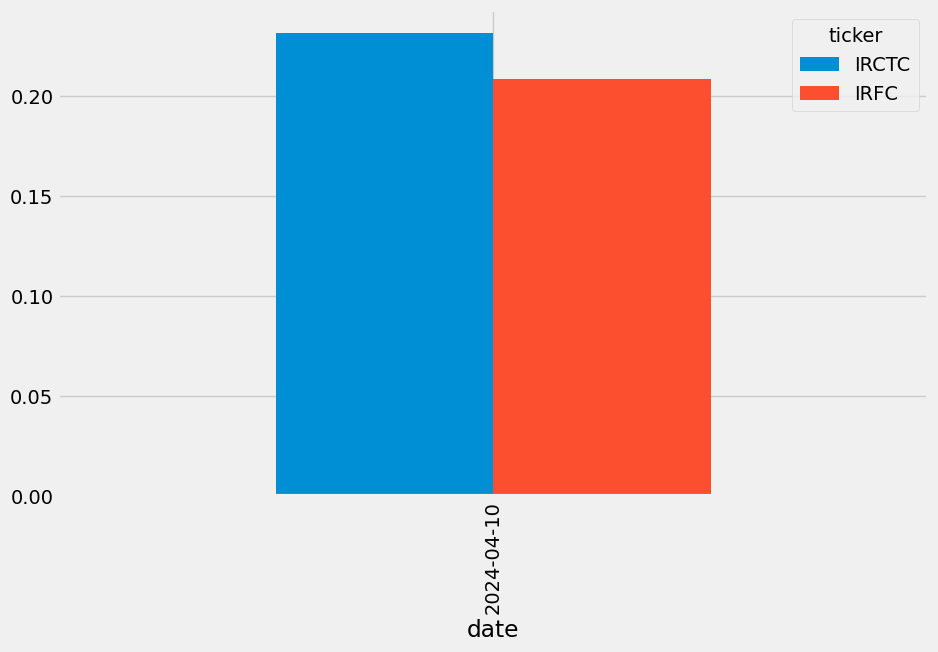

In [86]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

scored_news_numeric = scored_news[pd.to_numeric(scored_news['compound'], errors='coerce').notnull()]

scored_news_numeric['compound'] = pd.to_numeric(scored_news_numeric['compound'])

mean_c = scored_news_numeric.groupby(['date', 'ticker'])['compound'].mean()

mean_c = mean_c.unstack('ticker')

threshold = 0.1 


mean_c.plot.bar(figsize=(10, 6))
plt.show()



In [93]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()

# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset= ['headline', 'ticker'])

# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()

# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 169 headlines, now we have 124'

In [94]:
import pandas as pd

# Convert 'date' column to datetime
scored_news_clean['date'] = pd.to_datetime(scored_news_clean['date'])

# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])

# Cross-section the 'fb' row
single_day = single_day.xs('IRFC', level='ticker', drop_level=False)

# Check if the index ('fb', '2019-01-03') exists
if ('IRFC', '2024-04-10') in single_day.index:
    # Select the data for 'fb' on '2019-01-03'
    single_day = single_day.loc[('IRFC', '2024-04-10')]
else:
    print("Data for '2024-04-10' for 'IRFC' does not exist.")

# Convert the datetime string to datetime objects
single_day['time'] = pd.to_datetime(single_day['time'], format='%H:%M:%S.%f').dt.time

# Set the index to time 
single_day = single_day.set_index('time')

# Sort the DataFrame by index
single_day = single_day.sort_index()


/var/folders/66/wfh7gh351w3gw7_ss8s3s7n80000gn/T/ipykernel_73900/2100994868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scored_news_clean['date'] = pd.to_datetime(scored_news_clean['date'])


Index(['headline', 'neg', 'neu', 'pos', 'compound'], dtype='object')


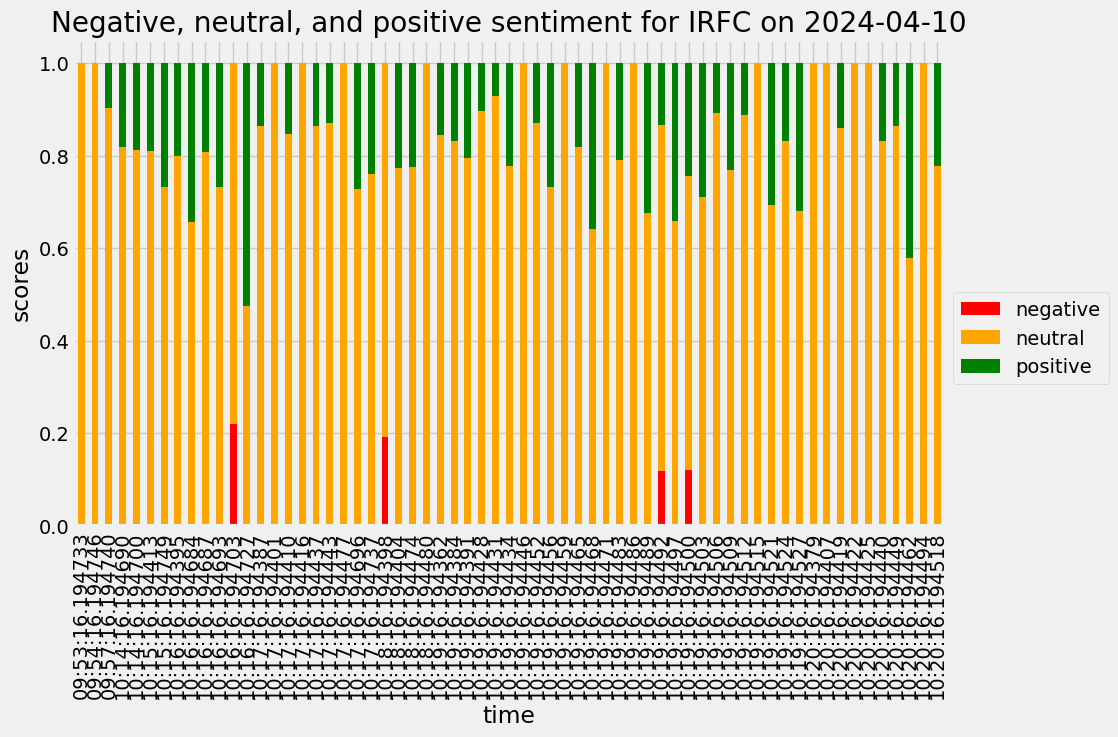

Based on sentiment analysis:
Total Sentiment Score: 9.042999999999997
Decision: Buy


In [95]:
import matplotlib.pyplot as plt

# Check the column names of the DataFrame
print(single_day.columns)

# Drop the columns if they exist
if 'compound' in single_day.columns and 'headline' in single_day.columns:
    plot_day = single_day.drop(['compound', 'headline'], axis=1)
else:
    print("Columns 'compound' and 'headline' not found.")
    # Initialize an empty DataFrame
    plot_day = pd.DataFrame()

# Check the number of columns in plot_day
if len(plot_day.columns) == 3:
    # Change the column names to 'negative', 'positive', and 'neutral'
    plot_day.columns = ['negative', 'neutral', 'positive']
    # Plot the DataFrame
    TITLE = "Negative, neutral, and positive sentiment for IRFC on 2024-04-10"
    COLORS = ["red", "orange", "green"]
    plot_day.plot.bar(stacked=True, figsize=(10, 6), title=TITLE, color=COLORS).legend(bbox_to_anchor=(1.2, 0.5))
    plt.ylabel('scores')
    plt.show()
else:
    print("Unexpected number of columns in plot_day DataFrame. Unable to plot.")


total_sentiment_score = plot_day['positive'].sum() - plot_day['negative'].sum()

# Define decision rule
if total_sentiment_score > 0:
    decision = "Buy"
elif total_sentiment_score < 0:
    decision = "Avoid"
else:
    decision = "Hold"

# Print decision
print("Based on sentiment analysis:")
print("Total Sentiment Score:", total_sentiment_score)
print("Decision:", decision)
